In [1]:
from photutils.detection import DAOStarFinder
from astropy.stats import sigma_clipped_stats
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from photutils.detection import find_peaks
import itertools
import os

In [5]:
off_off_dir="../../ThorlabsImages/imgs/lightsOff_LEDOff"
files = os.listdir(off_off_dir)

In [6]:
superDark = np.zeros(np.array(Image.open(os.path.join(off_off_dir,files[0])),dtype=np.int32).shape)
for f in files:
    superDark += np.array(Image.open(os.path.join(off_off_dir,f)),dtype=np.int32)

In [7]:
normalizedSuperDark = superDark/len(files)

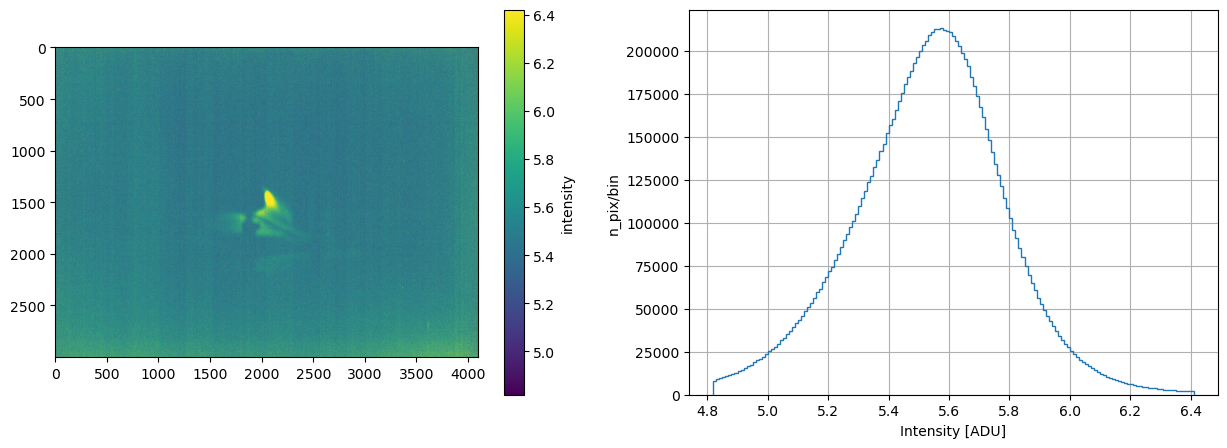

In [28]:
fig,axs = plt.subplots(1,2,figsize=[15,5])

im = axs[0].imshow(normalizedSuperDark,vmin=4.82,vmax=6.42)
plt.colorbar(im,label='intensity')

axs[1].hist(normalizedSuperDark.flatten(),histtype='step',bins=np.arange(4.82,6.42,step=0.01))
axs[1].grid()
axs[1].set_xlabel("Intensity [ADU]")
axs[1].set_ylabel("n_pix/bin")
plt.show()

In [30]:
off_on_dir="../../ThorlabsImages/imgs/lightsOff_LEDOn"
files = os.listdir(off_on_dir)
superSpot = np.zeros(np.array(Image.open(os.path.join(off_on_dir,files[0])),dtype=np.int32).shape)
for f in files:
    superSpot += np.array(Image.open(os.path.join(off_on_dir,f)),dtype=np.int32)

In [31]:
superSpot_norm = superSpot/len(files)

In [54]:
-2.500E-1

-0.25

In [47]:
np.nanpercentile((superSpot_norm-normalizedSuperDark).flatten(),[0,1,5,50,95,99,100]).astype(np.float16)

array([-2.202e+01, -2.500e-01, -1.300e-01,  1.480e+00,  5.788e+01,
        1.147e+02,  3.625e+02], dtype=float16)

(array([4706675., 1078970.,  870984.,  597972.,  418655.,  305089.,
         238850.,  195448.,  162356.,  137659.,  119491.,  105573.,
          93074.,   83130.,   74362.,   67468.,   61990.,   56766.,
          52598.,   49236.,   45991.,   43188.,   41090.,   38517.,
          36162.,   34393.,   32152.,   30767.,   29643.,   28294.,
          27150.,   25907.,   24624.,   23455.,   22486.,   21534.,
          20547.,   19643.,   19216.,   18232.,   17727.,   17260.,
          16512.,   16104.,   15724.,   15032.,   14563.,   13930.,
          13738.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,
        52., 54., 56., 58., 60., 62., 64., 66., 68., 70., 72., 74., 76.,
        78., 80., 82., 84., 86., 88., 90., 92., 94., 96., 98.]),
 <BarContainer object of 49 artists>)

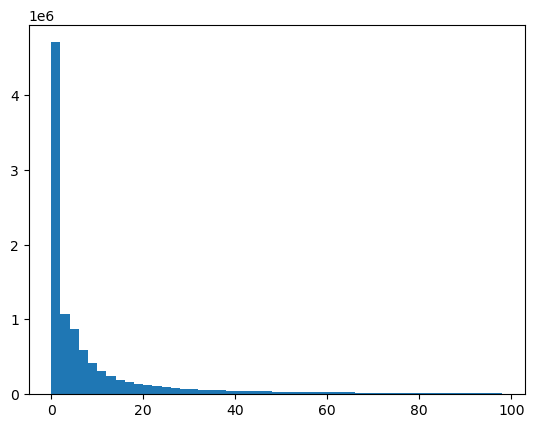

In [55]:
plt.hist((superSpot_norm-normalizedSuperDark).flatten(),bins=np.arange(0,100,step=2))

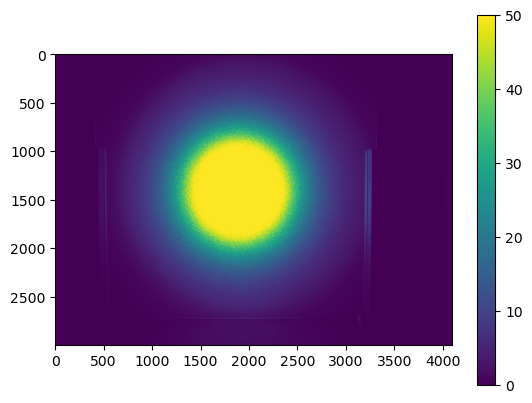

In [69]:
plt.imshow(superSpot_norm-normalizedSuperDark,vmin=0,vmax=50)
plt.colorbar()